<a href="https://colab.research.google.com/github/Testorugo/Exemplo-Data-Warehouse-e-Data-Lake/blob/main/EXEMPLO_DE_DATAWAREHOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Definindo o quantidade de produtos e colocando IDs de produtos, nomes e categorias aleatórias.
num_produtos = 600
produtos = {
    'produto_id' : range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Criando um DataFrame para armazenar os dados dos produtos.
df_produtos = pd.DataFrame(produtos)

# Definindo o número de vendas e criando um dicionário com datas aleatórias, IDs de produtos, quantidades e valores totais.
num_vendas = 1000  #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),  #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),  #
    'valor_total': np.random.randint(1000, 10000, num_vendas)  #
}

# Criando um DataFrame para armazenar os dados das vendas.
df_vendas = pd.DataFrame(data_vendas)

# Salvando os DataFrames de vendas e produtos em arquivos CSV.
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Lendo os dados salvos dos arquivos CSV para garantir que estão corretos.
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Fazendo o merge (junção) dos DataFrames de vendas e produtos usando o 'produto_id' como chave.
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame resultante do merge em um arquivo CSV, simulando um data warehouse.
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo e exibindo os dados do 'data warehouse' para verificar o resultado final.
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data Warehouse:")
print(df_warehouse)



Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome  categoria
0    2024-04-20         590         132         2082  Produto 590     Roupas
1    2024-04-24         590         137         5539  Produto 590     Roupas
2    2024-04-13         590         190         4488  Produto 590     Roupas
3    2024-04-23         125         160         5314  Produto 125     Roupas
4    2024-04-30         125          69         7313  Produto 125     Roupas
..          ...         ...         ...          ...          ...        ...
995  2024-04-27         555          84         2647  Produto 555     Roupas
996  2024-04-15         284         169         7187  Produto 284     Roupas
997  2024-04-24         141          65         8780  Produto 141  Alimentos
998  2024-04-09          55         136         8570   Produto 55  Alimentos
999  2024-04-25         547         180         3621  Produto 547     Roupas

[1000 rows x 6 columns]


\Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           316        11257
Produto 10          459        17170
Produto 100          63         3953
Produto 101         743        32361
Produto 102         453        10987
...                 ...          ...
Produto 92          258        20861
Produto 93          458        27128
Produto 96          275         9525
Produto 97          218        16296
Produto 99          333        10849

[483 rows x 2 columns]
\Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         36349      1631785
Eletrônicos       42351      1726582
Roupas            47397      2033420
\Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        3577       163581
2024-04-02        4186       180417
2024-04-03        4359       200434
2024-04-04        3

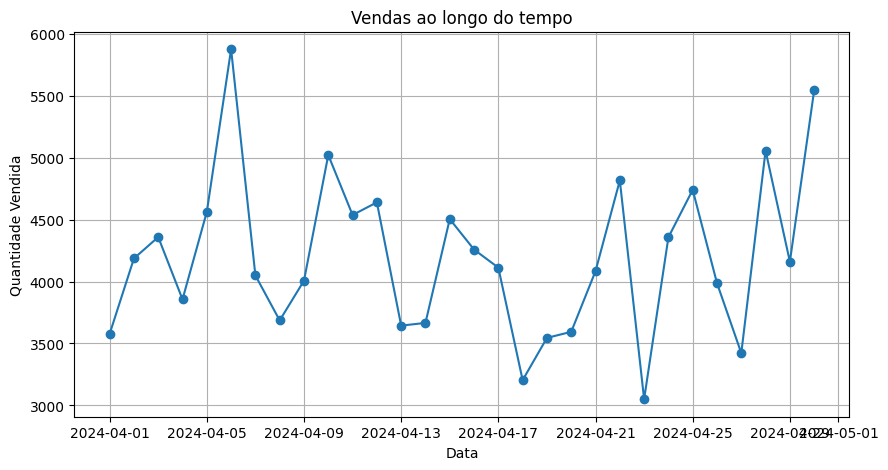

\Análise de desempenho de produto
nome
Produto 1      11257
Produto 10     17170
Produto 100     3953
Produto 101    32361
Produto 102    10987
               ...  
Produto 92     20861
Produto 93     27128
Produto 96      9525
Produto 97     16296
Produto 99     10849
Name: valor_total, Length: 483, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do data warehouse a partir de um arquivo CSV
df_waherouse = pd.read_csv('data_warehouse.csv')

# Agrupando os dados por nome do produto e calculando a soma das quantidades e valores totais de vendas
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("\Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupando os dados por categoria de produto e calculando a soma das quantidades e valores totais de vendas
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\Análise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o formato de data e hora, e agrupando os dados por data, calculando a soma das quantidades e valores totais
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\Análise de tendências temporais:")
print(vendas_por_data)

# Plotando um gráfico de linhas para visualizar a quantidade de vendas ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupando os dados por nome do produto e calculando a soma do valor total das vendas para análise de desempenho
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\Análise de desempenho de produto")
print(desempenho_produto)

